In [1]:
print("hello world!")

hello world!


In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# GET DATA

In [3]:
req = requests.get('https://www.cartolafcbrasil.com.br/scouts/cartola-fc-2020/rodada-1')

if req.status_code == 200:
    print("ok!")
    content = req.content

ok!


In [4]:
soup = BeautifulSoup(content, 'html.parser')
table = soup.find(name='table')

In [6]:
table_str = str(table)
df = pd.read_html(table_str)[0]
print(df)

                       Nome    Clube  Preço      J  Média  Últ. Pont.  \
0               Elton (ATA)      NaN   1421      1   1560        1560   
1             Saravia (LAT)      NaN   1319      1   1220        1220   
2             Marinho (ATA)      NaN   1210      1   1170        1170   
3        Igor Rabello (ZAG)      NaN   1341      1   1050        1050   
4       Léo Cittadini (MEI)      NaN   1290      1    980         980   
5         Diego Souza (ATA)      NaN   1276      1    960         960   
6       Jonatan Gomez (MEI)      NaN   1196      1    950         950   
7              Cléber (ATA)      NaN    797      1    900         900   
8              Alison (MEI)      NaN   1073      1    880         880   
9       Pedro Geromel (ZAG)      NaN   1109      1    830         830   
10          Vanderlei (GOL)      NaN    957      1    820         820   
11             Moisés (LAT)      NaN    949      1    810         810   
12    Guilherme Arana (LAT)      NaN   1797      1 

In [19]:
def scrape_stats(url, year_start, year_end, round_start, round_end):
    years = range(year_start, year_end + 1, 1)
    rounds  = range(round_start, round_end + 1, 1)
    
    final_df = pd.DataFrame()
    
    for year in years:
        for match in rounds:
            print("Extracting season {} round {} stats.".format(year, match))
            req_url = url.format(year, match)
            req = requests.get(req_url)
            soup = BeautifulSoup(req.content, 'html.parser')
            table = soup.find('table')
            df = pd.read_html(str(table))[0]
            df['Year'] = year
            df['Round'] = match
            
            final_df = final_df.append(df)
            
    return final_df

url = "https://www.cartolafcbrasil.com.br/scouts/cartola-fc-{}/rodada-{}"
df_2020 = scrape_stats(url, 2020,2020,1,38)
df_2021 =  scrape_stats(url, 2021,2021,1,20)

Extracting season 2020 round 1 stats.
Extracting season 2020 round 2 stats.
Extracting season 2020 round 3 stats.
Extracting season 2020 round 4 stats.
Extracting season 2020 round 5 stats.
Extracting season 2020 round 6 stats.
Extracting season 2020 round 7 stats.
Extracting season 2020 round 8 stats.
Extracting season 2020 round 9 stats.
Extracting season 2020 round 10 stats.
Extracting season 2020 round 11 stats.
Extracting season 2020 round 12 stats.
Extracting season 2020 round 13 stats.
Extracting season 2020 round 14 stats.
Extracting season 2020 round 15 stats.
Extracting season 2020 round 16 stats.
Extracting season 2020 round 17 stats.
Extracting season 2020 round 18 stats.
Extracting season 2020 round 19 stats.
Extracting season 2020 round 20 stats.
Extracting season 2020 round 21 stats.
Extracting season 2020 round 22 stats.
Extracting season 2020 round 23 stats.
Extracting season 2020 round 24 stats.
Extracting season 2020 round 25 stats.
Extracting season 2020 round 26 st

In [20]:
df_2020.head()

,Nome,Clube,Preço,J,Média,Últ. Pont.,Variação,DS,G,A,...,CA,PP,GS,FC,I,PS,PC,PI,Year,Round
0,Elton (ATA),NaN,1421,1,1560,1560,1021,NaN,2.0,NaN,...,1.0,NaN,NaN,1.0,1.0,NaN,NaN,4.0,2020,1
1,Saravia (LAT),NaN,1319,1,1220,1220,719,8.0,NaN,NaN,...,1.0,NaN,NaN,3.0,NaN,NaN,NaN,8.0,2020,1
2,Marinho (ATA),NaN,1210,1,1170,1170,710,1.0,1.0,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,5.0,2020,1
3,Igor Rabello (ZAG),NaN,1341,1,1050,1050,541,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,2020,1
4,Léo Cittadini (MEI),NaN,1290,1,980,980,490,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,1


In [21]:
df_2021.head()

,Nome,Clube,Preço,J,Média,Últ. Pont.,Variação,DS,G,A,...,CA,PP,GS,FC,I,PS,PC,PI,Year,Round
0,Thaciano (MEI),NaN,1671,1,1800,1800,1071,2.0,2.0,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,3.0,2021,1
1,Tiago Volpi (GOL),NaN,2054,1,1750,1750,854,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,1
2,Fernando Miguel (GOL),NaN,1671,1,1700,1700,971,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,1
3,Helinho (ATA),NaN,1392,1,1500,1500,892,3.0,1.0,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,6.0,2021,1
4,Lucas Evangelista (MEI),NaN,1434,1,1460,1460,834,2.0,1.0,1.0,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,4.0,2021,1


In [84]:
final_df = pd.DataFrame()
final_df = final_df.append(df_2020).append(df_2021)

In [85]:
final_df.head()

,Nome,Clube,Preço,J,Média,Últ. Pont.,Variação,DS,G,A,...,CA,PP,GS,FC,I,PS,PC,PI,Year,Round
0,Elton (ATA),NaN,1421,1,1560,1560,1021,NaN,2.0,NaN,...,1.0,NaN,NaN,1.0,1.0,NaN,NaN,4.0,2020,1
1,Saravia (LAT),NaN,1319,1,1220,1220,719,8.0,NaN,NaN,...,1.0,NaN,NaN,3.0,NaN,NaN,NaN,8.0,2020,1
2,Marinho (ATA),NaN,1210,1,1170,1170,710,1.0,1.0,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,5.0,2020,1
3,Igor Rabello (ZAG),NaN,1341,1,1050,1050,541,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,2020,1
4,Léo Cittadini (MEI),NaN,1290,1,980,980,490,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,1


In [91]:
final_df.to_csv("cartola.csv",index=False)

In [92]:
data = pd.read_csv('cartola.csv')
# Preview data.
display(data.head())

,Nome,Clube,Preço,J,Média,Últ. Pont.,Variação,DS,G,A,...,CA,PP,GS,FC,I,PS,PC,PI,Year,Round
0,Elton (ATA),NaN,1421,1,1560,1560,1021,NaN,2.0,NaN,...,1.0,NaN,NaN,1.0,1.0,NaN,NaN,4.0,2020,1
1,Saravia (LAT),NaN,1319,1,1220,1220,719,8.0,NaN,NaN,...,1.0,NaN,NaN,3.0,NaN,NaN,NaN,8.0,2020,1
2,Marinho (ATA),NaN,1210,1,1170,1170,710,1.0,1.0,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,5.0,2020,1
3,Igor Rabello (ZAG),NaN,1341,1,1050,1050,541,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,2020,1
4,Léo Cittadini (MEI),NaN,1290,1,980,980,490,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,1


In [93]:
data["Posicao"] = data["Nome"].apply(lambda x : pd.Series(x.split('(')))[1].str.replace(")","", regex=True)

In [94]:
data.head()

,Nome,Clube,Preço,J,Média,Últ. Pont.,Variação,DS,G,A,...,PP,GS,FC,I,PS,PC,PI,Year,Round,Posicao
0,Elton (ATA),NaN,1421,1,1560,1560,1021,NaN,2.0,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,4.0,2020,1,ATA
1,Saravia (LAT),NaN,1319,1,1220,1220,719,8.0,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,8.0,2020,1,LAT
2,Marinho (ATA),NaN,1210,1,1170,1170,710,1.0,1.0,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,5.0,2020,1,ATA
3,Igor Rabello (ZAG),NaN,1341,1,1050,1050,541,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,2020,1,ZAG
4,Léo Cittadini (MEI),NaN,1290,1,980,980,490,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,1,MEI


In [95]:
data["Posicao"].value_counts()

MEI    762
ATA    745
LAT    524
TEC    338
ZAG    279
GOL    252
Name: Posicao, dtype: int64

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2958 entries, 0 to 2957
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Nome        2958 non-null   object 
 1   Clube       58 non-null     float64
 2   Preço       2958 non-null   int64  
 3   J           2958 non-null   int64  
 4   Média       2958 non-null   int64  
 5   Últ. Pont.  2958 non-null   int64  
 6   Variação    2958 non-null   int64  
 7   DS          2376 non-null   float64
 8   G           1752 non-null   float64
 9   A           1500 non-null   float64
 10  SG          1082 non-null   float64
 11  FS          2418 non-null   float64
 12  FF          2084 non-null   float64
 13  FD          1935 non-null   float64
 14  FT          900 non-null    float64
 15  DE          195 non-null    float64
 16  DP          138 non-null    float64
 17  GC          93 non-null     float64
 18  CV          164 non-null    float64
 19  CA          1616 non-null  

In [97]:
data.describe()

,Clube,Preço,J,Média,Últ. Pont.,Variação,DS,G,A,SG,...,CA,PP,GS,FC,I,PS,PC,PI,Year,Round
count,58.000000,2958.000000,2958.000000,2958.000000,2958.000000,2958.000000,2376.000000,1752.000000,1500.000000,1082.000000,...,1616.000000,241.000000,277.000000,2318.000000,1312.000000,122.000000,108.000000,2477.000000,2958.000000,2958.000000
mean,9605.568966,1240.505747,199.135227,724.282285,678.950980,223.718053,253.270623,321.373288,373.518667,518.306839,...,346.750000,2312.473029,2020.379061,253.046592,428.095274,4567.155738,5159.018519,293.066613,2020.344828,16.396552
std,4904.114642,1419.179757,1494.617575,1440.767914,1510.488029,1498.713112,1663.424734,1932.830061,2084.455790,2439.215008,...,2010.508278,4758.149978,4501.088337,1684.499384,2223.572479,5875.826425,5996.791878,1624.178767,0.475392,10.420478
min,123.000000,76.000000,1.000000,123.000000,-680.000000,-398.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2020.000000,1.000000
25%,12345.000000,810.000000,4.000000,432.000000,120.000000,-39.000000,6.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,6.000000,5.000000,1.000000,1.000000,1.000000,21.000000,2020.000000,8.000000
50%,12345.000000,1062.000000,10.000000,500.000000,440.000000,6.000000,14.000000,2.000000,2.000000,3.000000,...,2.000000,1.000000,12.000000,10.000000,2.000000,2.000000,1234.000000,52.000000,2020.000000,15.000000
75%,12345.000000,1315.000000,17.000000,614.000000,790.000000,100.000000,28.000000,5.000000,3.000000,5.000000,...,3.000000,1.000000,30.000000,20.000000,5.000000,12345.000000,12345.000000,102.000000,2021.000000,24.000000
max,12345.000000,12345.000000,12345.000000,12345.000000,12345.000000,12345.000000,12345.000000,12345.000000,12345.000000,12345.000000,...,12345.000000,12345.000000,12345.000000,12345.000000,12345.000000,12345.000000,12345.000000,12345.000000,2021.000000,38.000000


NameError: name 'save_fig' is not defined

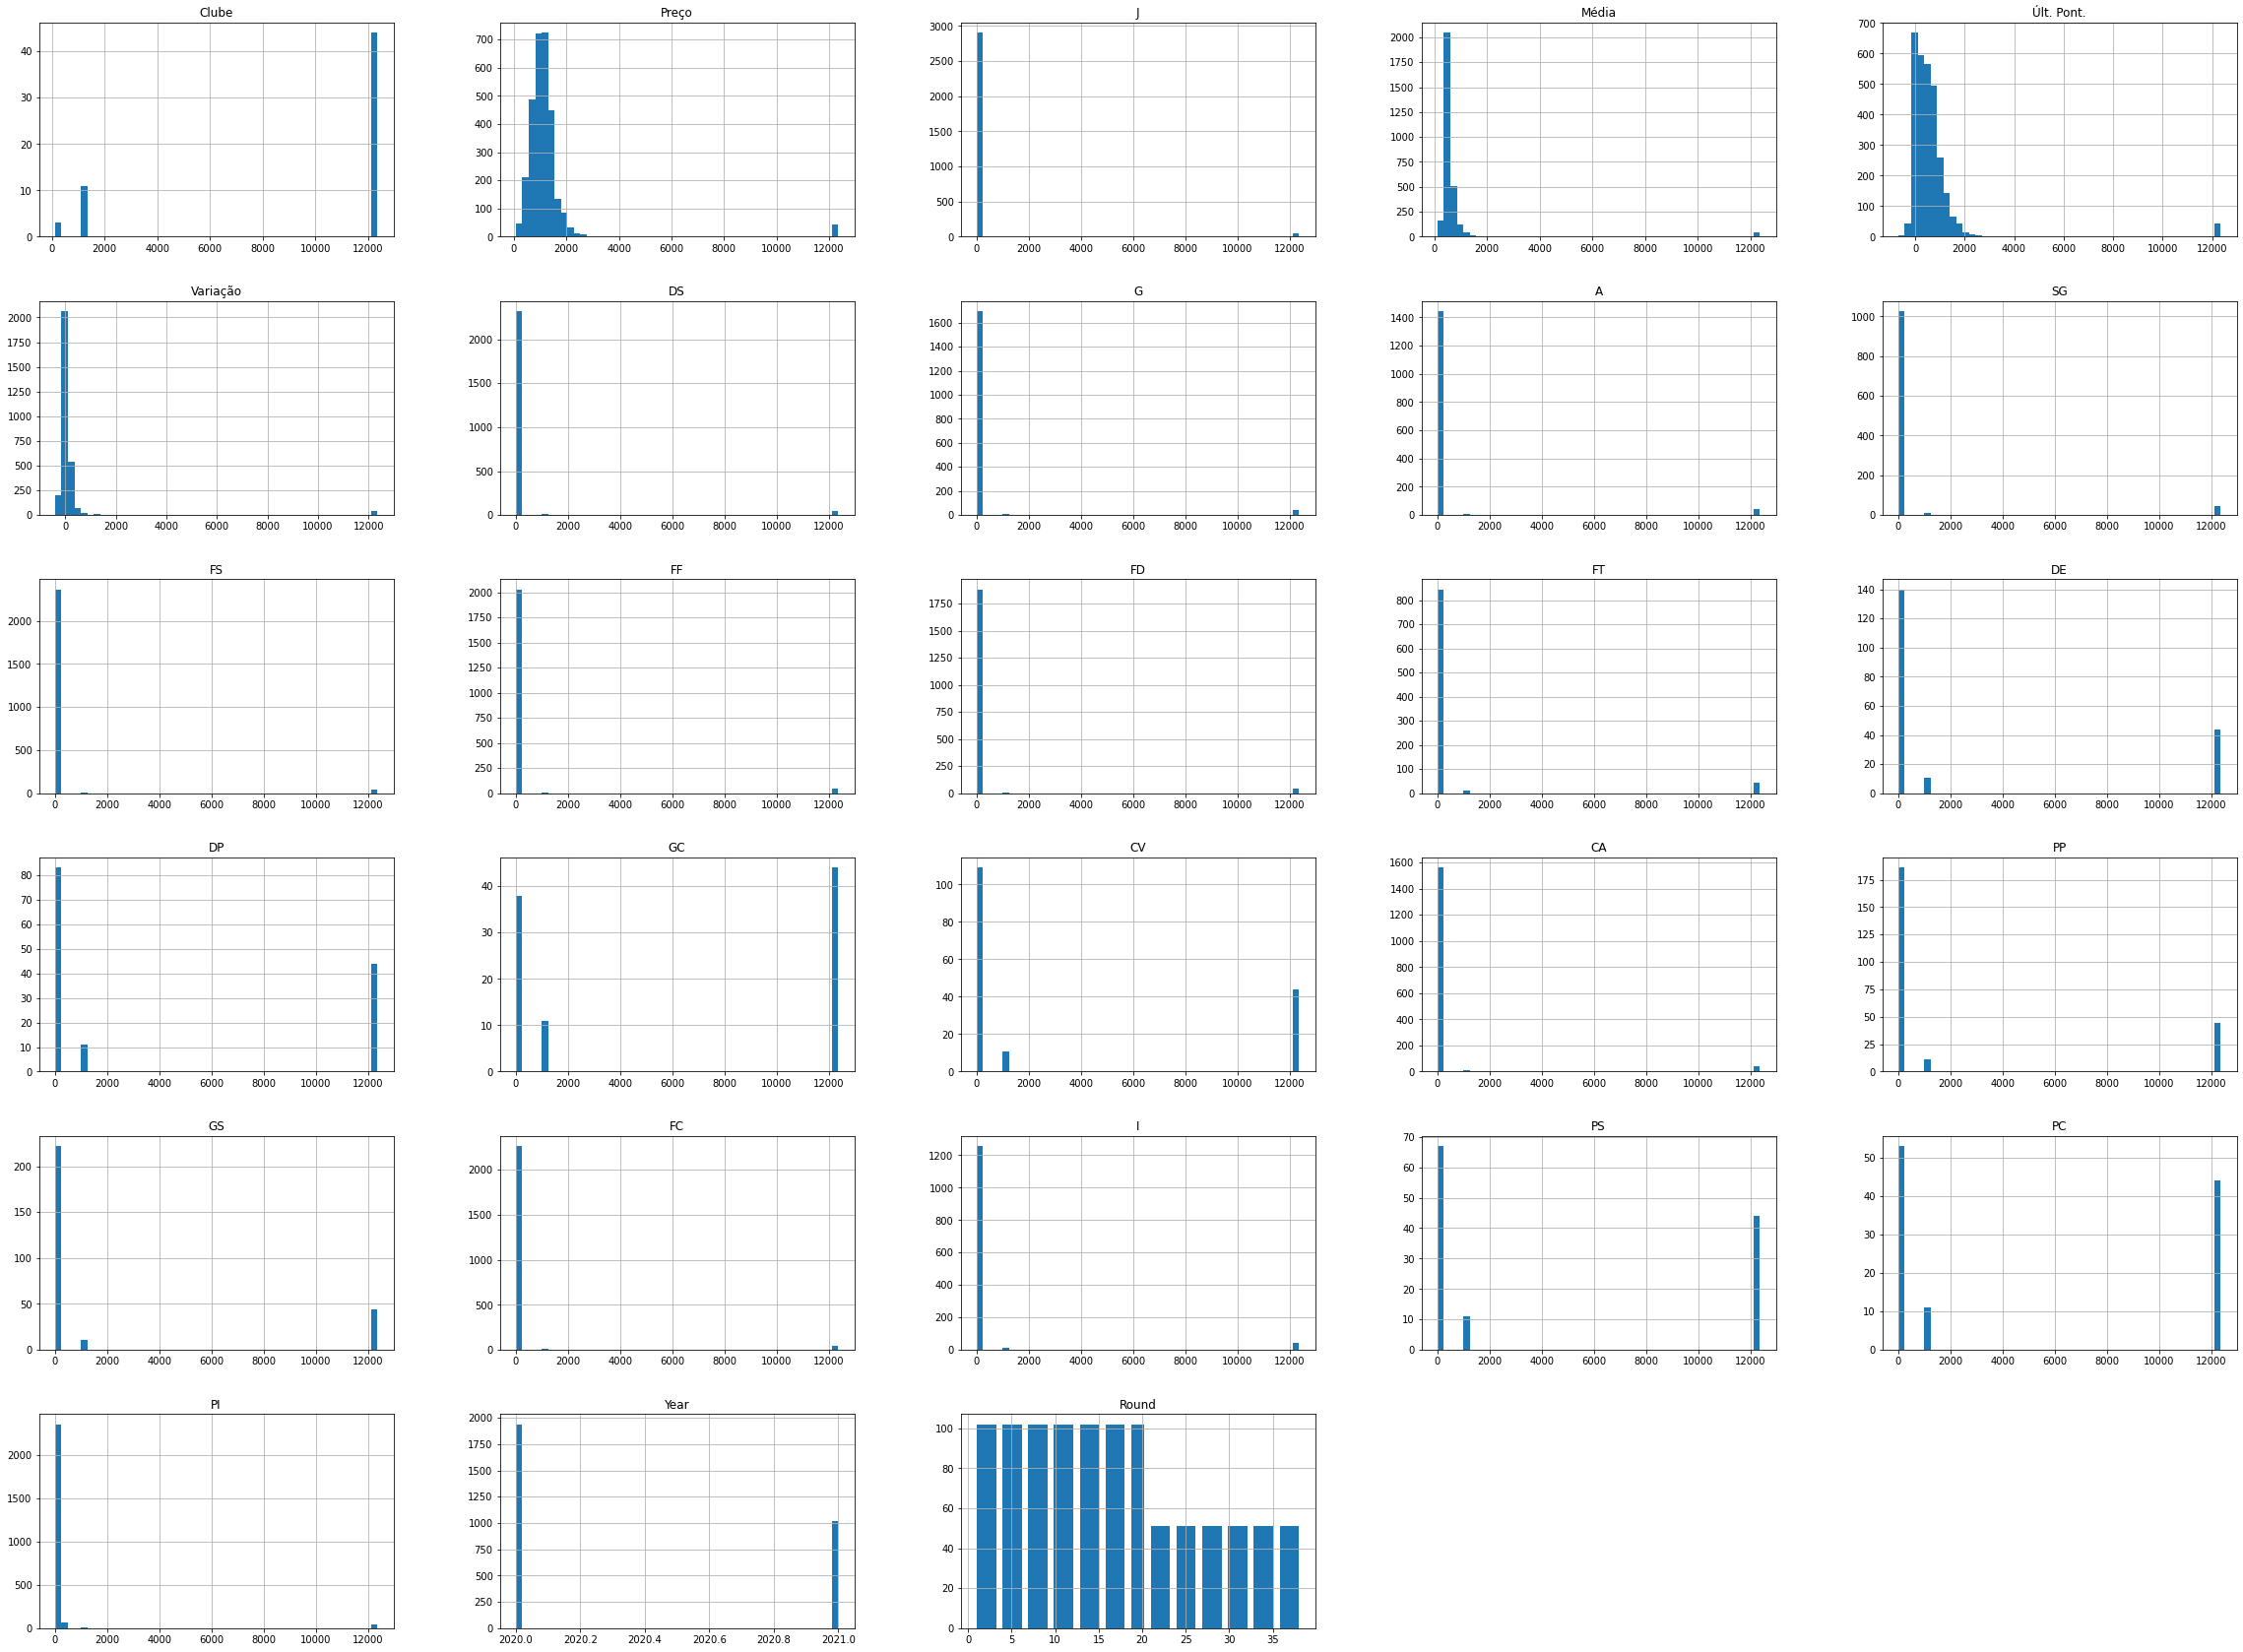

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(40,30))
save_fig("attribute_histogram_plots")
plt.show()

In [90]:
#to make this notebook's the identifical at every run 
import numpy as np
np.random.seed(42)